### Hyperparameter Optimization For Xgboost using RandomizedSearchCV

In [94]:
import xgboost
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale

#### importing the data

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Hyperparameter-Optimization/master/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [15]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


### Types of variables


In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type int64.


First of all, I will explore Numerical variables.

### Numerical Variables

In [38]:
# List of Numerical Variables
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
df[numerical_features].head()

Number of numerical variables: 11


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


#### Discrete Feature
+ Numerical variables are usually of 2 types 
+ Continuous variable and discrete variable

In [39]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 5


#### Continuous Variable

In [40]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 6


#### Categorical Variables

In [41]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 3 categorical variables

The categorical variables are :

 ['Surname', 'Geography', 'Gender']


#### Frequency counts of categorical variables


Now, I will check the frequency counts of categorical variables.

In [42]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64


In [43]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(df[var].value_counts()/np.float(len(df)))

Smith       0.0032
Scott       0.0029
Martin      0.0029
Walker      0.0028
Brown       0.0026
             ...  
Izmailov    0.0001
Bold        0.0001
Bonham      0.0001
Poninski    0.0001
Burbidge    0.0001
Name: Surname, Length: 2932, dtype: float64
France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64
Male      0.5457
Female    0.4543
Name: Gender, dtype: float64


#### Number of labels: cardinality


The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [44]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Surname  contains  2932  labels
Geography  contains  3  labels
Gender  contains  2  labels


##### We can see that **`Surname  `** column contains relatively large number of labels as compared to other columns. I will check for cardinality after train-test split.

In [17]:
df[df.duplicated()].shape

(0, 14)

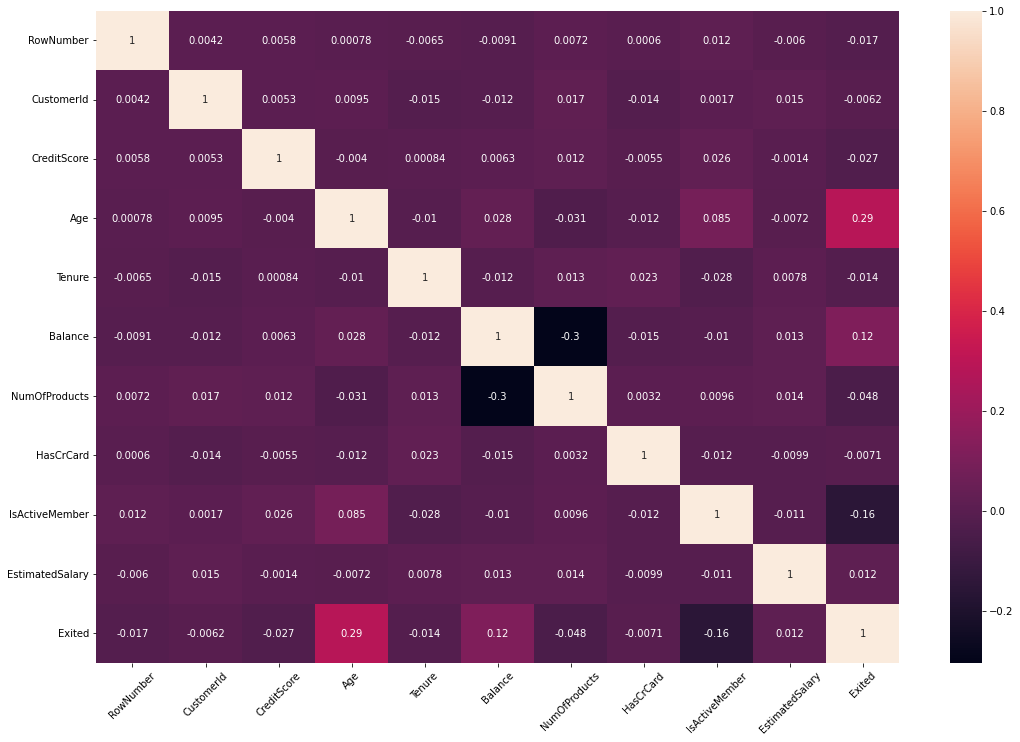

In [22]:
fig= plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45)
plt.show()

### Analysis of the response column<a class="anchor" id="3.6"></a>
It is very important to look at the response column, which holds the information, which we are going to predict. In our case we should look at 'Salary' column and compare its values to other columns.
First of all we should look at the number of Employees with salary '<=50K' and '>50K' in the Dependent column 'Salary'.

#### Checking for Imbalanced or balanced dataset with regards to the Target

In [79]:
customer_not_churn = len(df[df.Exited == 0])
customer_churn = len(df[df.Exited == 1])
print("Percentage of Customer Churn: {:.2f}%".format((customer_churn / (len(df.Exited))*100)))
print("Percentage of Customer that did not Churn: {:.2f}%".format((customer_not_churn / (len(df.Exited))*100)))

Percentage of Customer Churn: 20.37%
Percentage of Customer that did not Churn: 79.63%


Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

Here, the class “0” is called the majority class, and the much smaller in size “1” class is called the minority class.

In [70]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Text(0.5, 1.0, 'Exited')

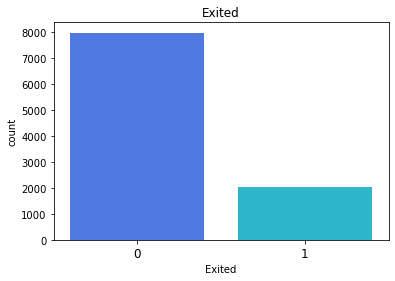

In [80]:
pal = sns.color_palette('rainbow')
sns.countplot(x='Exited', data=df, palette = pal, 
              order=df['Exited'].value_counts().index, );
plt.xticks(fontsize = 12)
plt.title('Exited')

In [83]:
df['Exited'].value_counts().index

Int64Index([0, 1], dtype='int64')

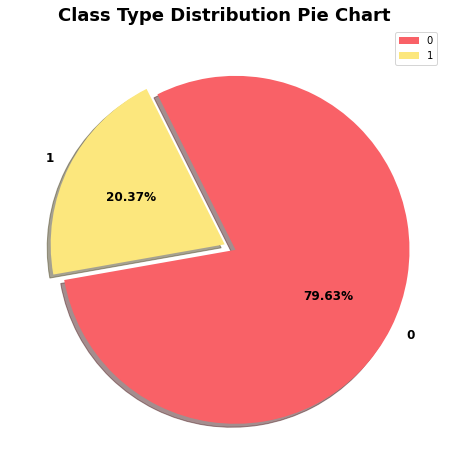

In [84]:
plt.figure(figsize = (12,8))
plt.pie(df['Exited'].value_counts(),
       labels=df['Exited'].value_counts().index,
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        colors = ["#F96167", "#FCE77D"],
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

### Problems with imbalanced data classification
If we explain it in a very simple manner, the main problem with imbalanced dataset prediction is how accurately are we actually predicting both majority and minority class?

Sometimes when the records of a certain class are much more than the other class, our classifier may get biased towards the prediction. In this case, the confusion matrix for the classification problem shows how well our model classifies the target classes and we arrive at the accuracy of the model from the confusion matrix.

It is calculated based on the total no of correct predictions by the model divided by the total no of predictions. In the an example case it is (0+95)/(0+95+0+5)=0.95 or 95%. It means that the model fails to identify the minority class yet the accuracy score of the model will be 95%

Thus our traditional approach of classification and model accuracy calculation is not useful in the case of the imbalanced dataset

### Feature Engineering

#### Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it scores

#### Applying Standard Scaler
+ For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).
+ x_scaled = x – mean/std_dev
+ However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler

In [52]:
df[continuous_feature]

,RowNumber,CustomerId,CreditScore,Age,Balance,EstimatedSalary
0,1,15634602,619,42,0.00,101348.88
1,2,15647311,608,41,83807.86,112542.58
2,3,15619304,502,42,159660.80,113931.57
3,4,15701354,699,39,0.00,93826.63
4,5,15737888,850,43,125510.82,79084.10
...,...,...,...,...,...,...
9995,9996,15606229,771,39,0.00,96270.64
9996,9997,15569892,516,35,57369.61,101699.77
9997,9998,15584532,709,36,0.00,42085.58
9998,9999,15682355,772,42,75075.31,92888.52


In [53]:
df_standard_scaled = df.copy()
features = df_standard_scaled[continuous_feature]

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-1.731878,-0.783213,Hargrave,-0.326221,France,Female,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-1.731531,-0.606534,Hill,-0.440036,Spain,Female,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.731185,-0.995885,Onio,-1.536794,France,Female,0.293517,8,1.333053,3,1,0,0.240687,1
3,-1.730838,0.144767,Boni,0.501521,France,Female,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,-1.730492,0.652659,Mitchell,2.063884,Spain,Female,0.388871,2,0.785728,1,1,1,-0.365276,0


#### Now if we check the mean and standard deviation of our scaled data it should have a Mean '0' and Standard deviation '1'

In [55]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(df_standard_scaled.std()),1)

Mean
 RowNumber         -0.0
CustomerId         0.0
CreditScore       -0.0
Age                0.0
Tenure             5.0
Balance           -0.0
NumOfProducts      1.5
HasCrCard          0.7
IsActiveMember     0.5
EstimatedSalary   -0.0
Exited             0.2
dtype: float64 
Standard Devaition 
 RowNumber          1.0
CustomerId         1.0
CreditScore        1.0
Age                1.0
Tenure             3.0
Balance            1.0
NumOfProducts      1.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    1.0
Exited             0.0
dtype: float64 1


In [56]:
data = df_standard_scaled.copy()
data.drop('Exited',axis=1, inplace =True)
data = pd.get_dummies(data.iloc[:,:])
data['Exited'] = df.Exited
data.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,-1.731878,-0.783213,-0.326221,0.293517,2,-1.225848,1,1,1,0.021886,...,0,0,0,0,1,0,0,1,0,1
1,-1.731531,-0.606534,-0.440036,0.198164,1,0.117350,1,0,1,0.216534,...,0,0,0,0,0,0,1,1,0,0
2,-1.731185,-0.995885,-1.536794,0.293517,8,1.333053,3,1,0,0.240687,...,0,0,0,0,1,0,0,1,0,1
3,-1.730838,0.144767,0.501521,0.007457,1,-1.225848,2,0,0,-0.108918,...,0,0,0,0,1,0,0,1,0,0
4,-1.730492,0.652659,2.063884,0.388871,2,0.785728,1,1,1,-0.365276,...,0,0,0,0,0,0,1,1,0,0


### 5.2 Label Encoding <a class="anchor" id="5.2"></a>

In [58]:
data = df_standard_scaled.copy()
label_encoder = LabelEncoder()
data["Surname"]=label_encoder.fit_transform(data["Surname"])
data["Geography"]=label_encoder.fit_transform(data["Geography"])
data["Gender"]=label_encoder.fit_transform(data["Gender"])
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-1.731878,-0.783213,1115,-0.326221,0,0,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-1.731531,-0.606534,1177,-0.440036,2,0,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.731185,-0.995885,2040,-1.536794,0,0,0.293517,8,1.333053,3,1,0,0.240687,1
3,-1.730838,0.144767,289,0.501521,0,0,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,-1.730492,0.652659,1822,2.063884,2,0,0.388871,2,0.785728,1,1,1,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.730492,-1.177652,1999,1.246488,0,1,0.007457,5,-1.225848,2,1,0,-0.066419,0
9996,1.730838,-1.682806,1336,-1.391939,0,1,-0.373958,10,-0.306379,1,1,1,0.027988,0
9997,1.731185,-1.479282,1570,0.604988,0,0,-0.278604,7,-1.225848,1,0,1,-1.008643,1
9998,1.731531,-0.119356,2345,1.256835,1,1,0.293517,3,-0.022608,2,1,0,-0.125231,1


#### splitting the data into independent and dependent features

In [69]:
x = data.iloc[:,3:13]
y = data.iloc[:,13]

### Hyper Parameter Optimization

In [85]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [87]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [88]:
classifier=xgboost.XGBClassifier()

In [89]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [91]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 20.0 seconds.


In [92]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [93]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.3,
 'colsample_bytree': 0.4}

In [103]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=3,
              monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)

In [104]:
score=cross_val_score(classifier,x,y,cv=10)

In [105]:
score

array([0.87 , 0.868, 0.874, 0.867, 0.866, 0.858, 0.872, 0.876, 0.857,
       0.861])

In [106]:
score.mean()

0.8669